Import Modules

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import data_importer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

c:\Users\Cesar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Importing DB

In [2]:
dataset = data_importer.import_database('student_habits_performance.csv')
print(dataset)

    student_id  age  gender  study_hours_per_day  social_media_hours  \
0        S1000   23  Female                  0.0                 1.2   
1        S1001   20  Female                  6.9                 2.8   
2        S1002   21    Male                  1.4                 3.1   
3        S1003   23  Female                  1.0                 3.9   
4        S1004   19  Female                  5.0                 4.4   
..         ...  ...     ...                  ...                 ...   
995      S1995   21  Female                  2.6                 0.5   
996      S1996   17  Female                  2.9                 1.0   
997      S1997   20    Male                  3.0                 2.6   
998      S1998   24    Male                  5.4                 4.1   
999      S1999   19  Female                  4.3                 2.9   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0              1.1            No                   85.0        

Exploratory Analysis

In [3]:
dataset.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [4]:
dataset.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [6]:
# The column "student_id" will not be necessary in this project.
dataset = dataset.drop(columns=['student_id'])

Filling missing values

In [7]:
display(dataset.groupby(['parental_education_level']).size())

parental_education_level
Bachelor       350
High School    392
Master         167
dtype: int64

In [8]:
dataset['parental_education_level'].fillna('High School', inplace=True)
dataset['parental_education_level'].isnull().sum()
display(dataset.groupby(['parental_education_level']).size())

parental_education_level
Bachelor       350
High School    483
Master         167
dtype: int64

Exploring other categorical atributes

In [9]:
display(dataset.groupby(['gender']).size())
# We need to transform 'Other' into Female

gender
Female    481
Male      477
Other      42
dtype: int64

In [10]:
display(dataset.groupby(['part_time_job']).size())

part_time_job
No     785
Yes    215
dtype: int64

In [11]:
display(dataset.groupby(['diet_quality']).size())

diet_quality
Fair    437
Good    378
Poor    185
dtype: int64

In [12]:
display(dataset.groupby(['internet_quality']).size())

internet_quality
Average    391
Good       447
Poor       162
dtype: int64

In [13]:
display(dataset.groupby(['extracurricular_participation']).size())

extracurricular_participation
No     682
Yes    318
dtype: int64

Outliers

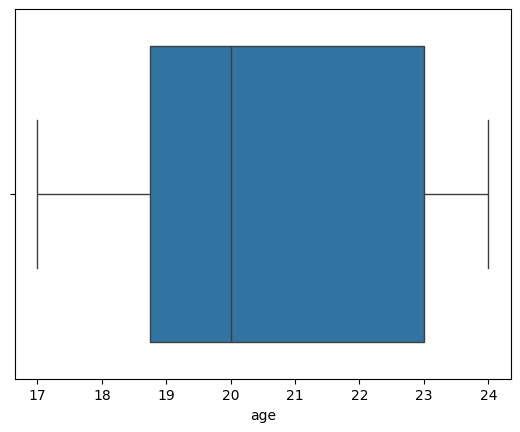

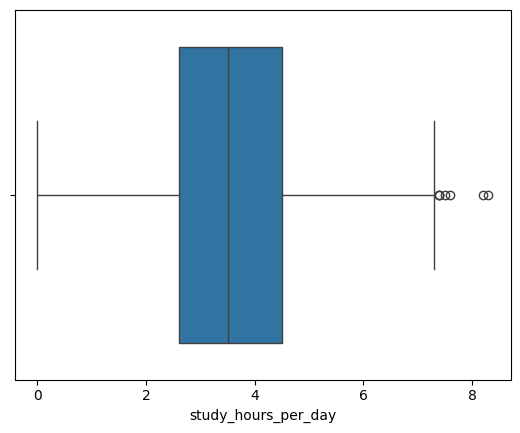

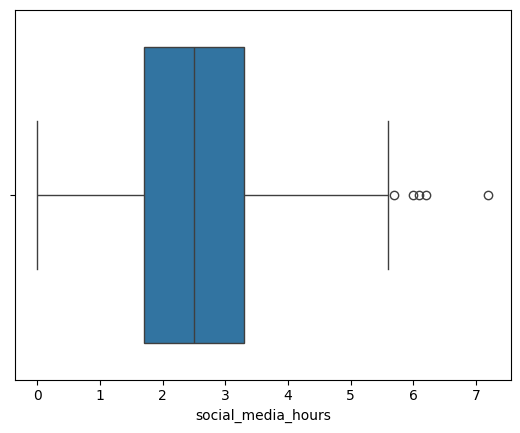

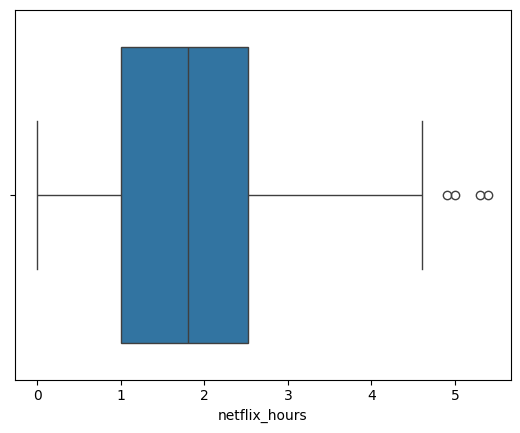

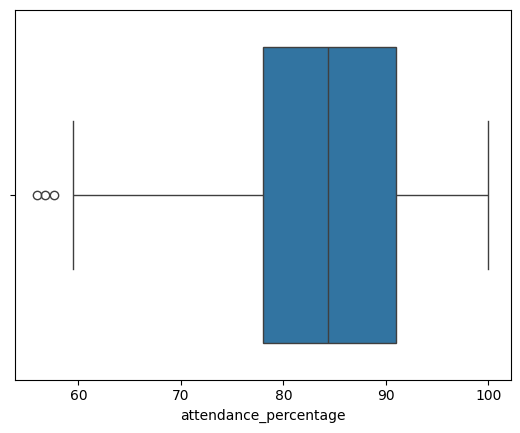

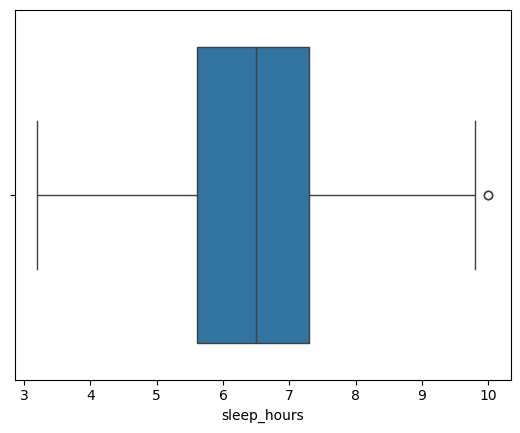

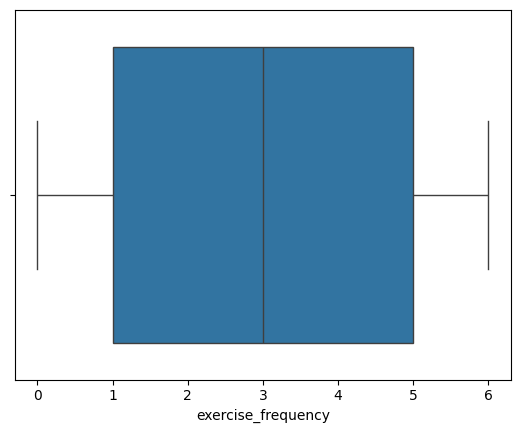

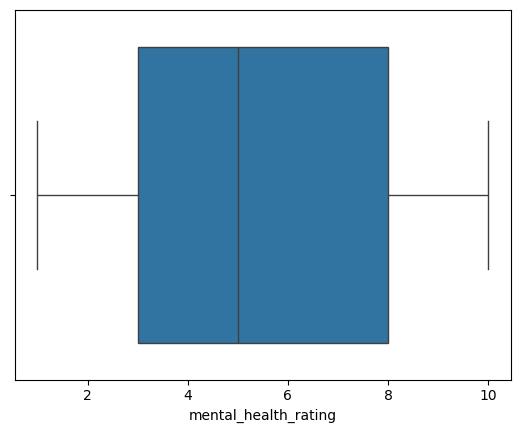

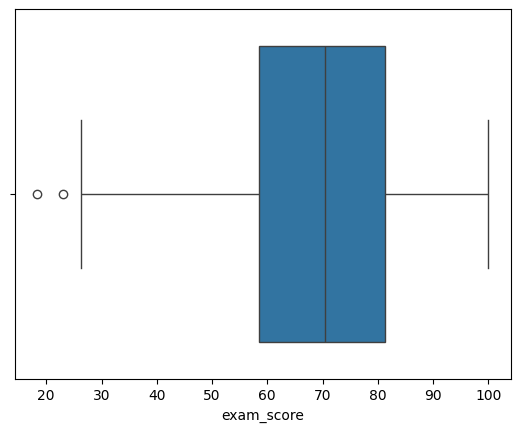

In [14]:
columns = [
    'age', 'study_hours_per_day', 'social_media_hours',
    'netflix_hours', 'attendance_percentage',
    'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'exam_score'
]
for col in columns:
    sns.boxplot(data=dataset, x=col)
    plt.show()

In [15]:
dataset.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

In [16]:
outlier_columns = ['exam_score', 'sleep_hours', 'attendance_percentage', 'study_hours_per_day', 'social_media_hours', 'netflix_hours']

filtered_df = dataset.copy()

for column in outlier_columns:
    mean = filtered_df[column].mean()
    std = filtered_df[column].std()
    
    # Keep only the rows where z-score is between -3 and 3
    filtered_df = filtered_df[np.abs((filtered_df[column] - mean) / std) < 3]

Combinating columns

In [17]:
filtered_df.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

In [18]:
filtered_df['total_screen_time'] = filtered_df['netflix_hours'] + filtered_df['social_media_hours']

Converting Categorical columns to numerical columns

In [19]:
cat_col = ['gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation']
label_encoder = LabelEncoder()

In [20]:
# label encoding
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School' : 0, 'Bachelor' : 1, 'Master' : 2}
internet_quality  = {'Poor' : 0, 'Average' : 1, 'Good' : 2}

filtered_df['diet_quality'] = filtered_df['diet_quality'].map(diet_quality)
filtered_df['parental_education_level'] = filtered_df['parental_education_level'].map(parental_education_level)
filtered_df['internet_quality'] = filtered_df['internet_quality'].map(internet_quality)

In [21]:
filtered_df['gender'].value_counts()
filtered_df['gender'] = filtered_df['gender'].replace('Other', 'Female')

In [22]:
print(filtered_df['gender'].value_counts(), filtered_df['part_time_job'].value_counts(), filtered_df['extracurricular_participation'].value_counts())

gender
Female    519
Male      473
Name: count, dtype: int64 part_time_job
No     779
Yes    213
Name: count, dtype: int64 extracurricular_participation
No     676
Yes    316
Name: count, dtype: int64


In [23]:
df = filtered_df.copy()
df['extracurricular_participation'] = df['extracurricular_participation'].map({'Yes': 1, 'No': 0})
df['part_time_job'] = df['part_time_job'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

Visualization

In [24]:
corr_matrix = df.corr()
corr_matrix["exam_score"].sort_values(ascending=True)

total_screen_time               -0.233526
netflix_hours                   -0.167123
social_media_hours              -0.164083
internet_quality                -0.029811
part_time_job                   -0.029515
parental_education_level        -0.024655
age                             -0.011105
extracurricular_participation   -0.006180
gender                           0.021844
diet_quality                     0.023046
attendance_percentage            0.088507
sleep_hours                      0.124239
exercise_frequency               0.152952
mental_health_rating             0.319113
study_hours_per_day              0.824307
exam_score                       1.000000
Name: exam_score, dtype: float64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'study_hours_per_day'}>,
        <Axes: title={'center': 'social_media_hours'}>],
       [<Axes: title={'center': 'netflix_hours'}>,
        <Axes: title={'center': 'part_time_job'}>,
        <Axes: title={'center': 'attendance_percentage'}>,
        <Axes: title={'center': 'sleep_hours'}>],
       [<Axes: title={'center': 'diet_quality'}>,
        <Axes: title={'center': 'exercise_frequency'}>,
        <Axes: title={'center': 'parental_education_level'}>,
        <Axes: title={'center': 'internet_quality'}>],
       [<Axes: title={'center': 'mental_health_rating'}>,
        <Axes: title={'center': 'extracurricular_participation'}>,
        <Axes: title={'center': 'exam_score'}>,
        <Axes: title={'center': 'total_screen_time'}>]], dtype=object)

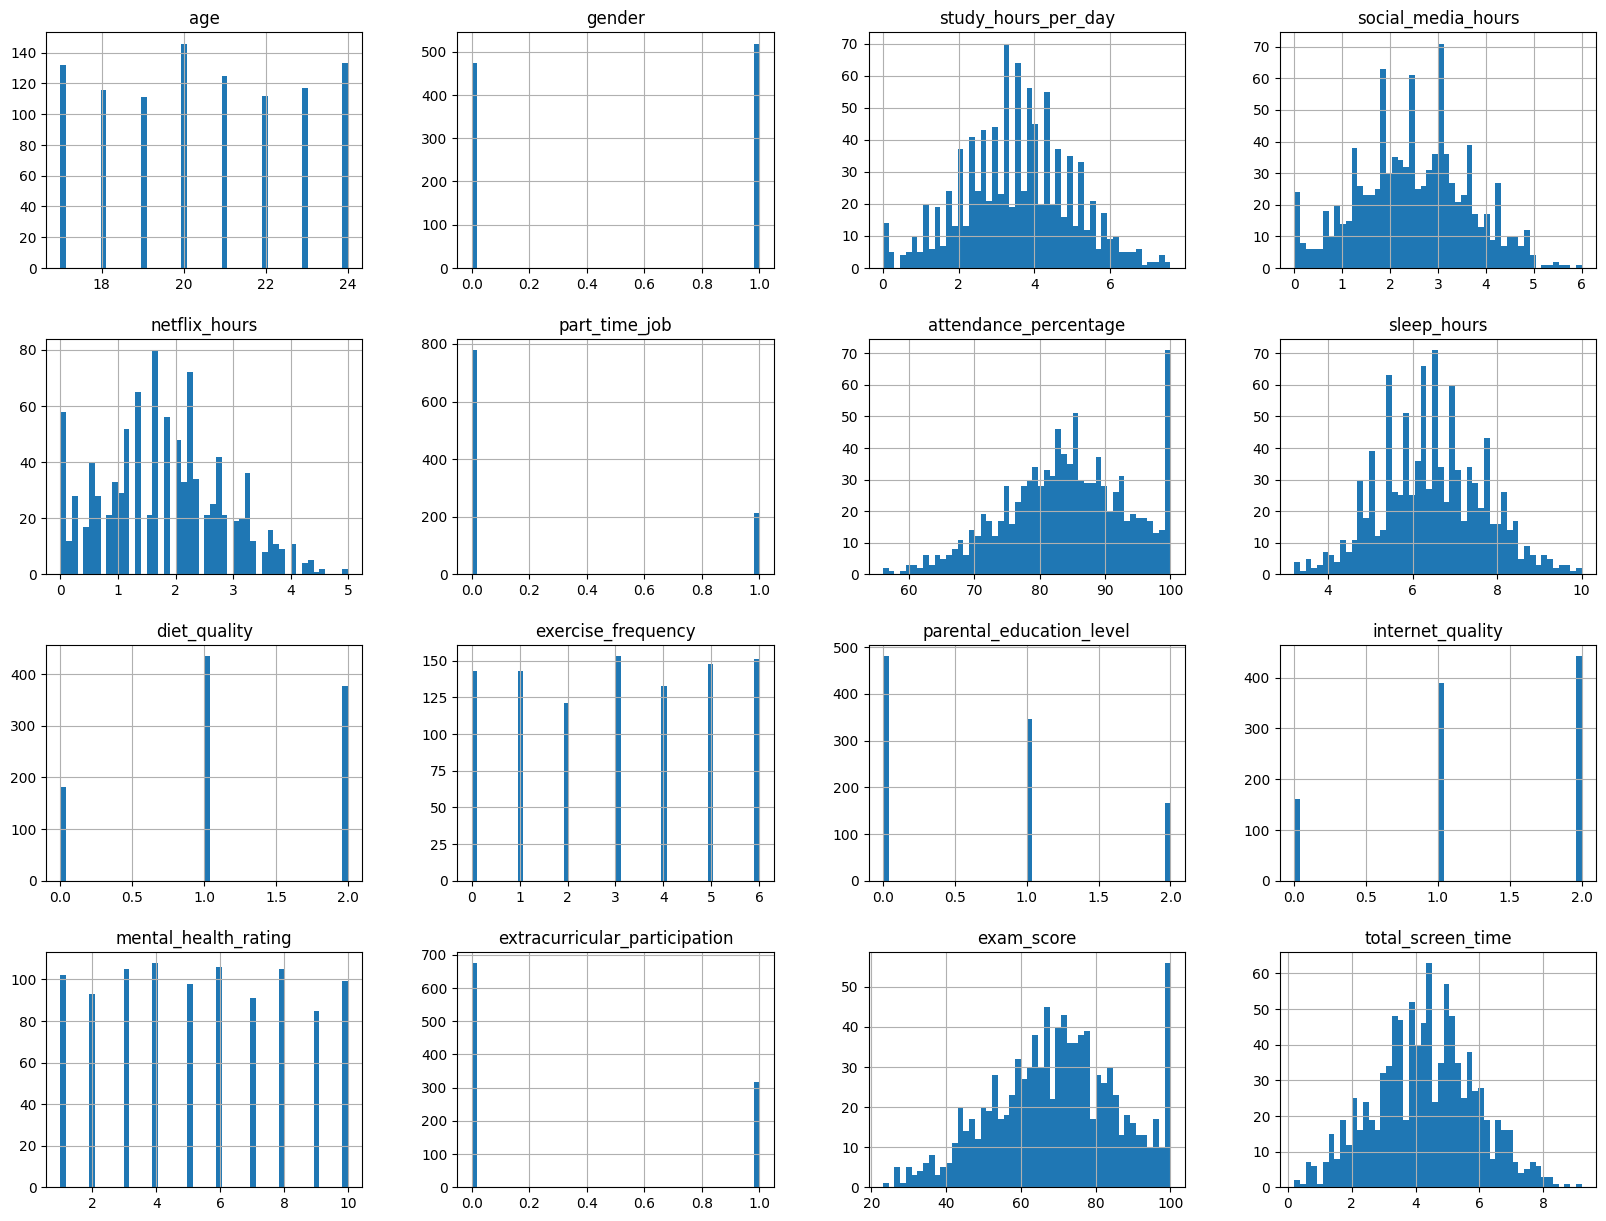

In [25]:
df.hist(bins=50, figsize=(20,15))

In [26]:
# I'll consider these columns to train the model:
selected_features = [
    'study_hours_per_day',
    'mental_health_rating',
    'exercise_frequency',
    'sleep_hours',
    'attendance_percentage',
    'total_screen_time',
]

In [27]:
x = df[selected_features]
y = df['exam_score']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
}

In [28]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Modelo: {model}\nMSE: {mse}\n r2: {r2}')

# The LinearRegression is the best model, the suspicious results can be explained by the low number of rows in the dataset

Modelo: LinearRegression()
MSE: 23.65929473338624
 r2: 0.9149722382518597
Modelo: RandomForestRegressor(random_state=42)
MSE: 37.849715507537745
 r2: 0.8639741112879237
Modelo: GradientBoostingRegressor()
MSE: 29.53177107408334
 r2: 0.8938674874638417


In [29]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
joblib.dump(model, "exam_score_predictor.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']